In [1]:
%matplotlib inline
import os
from matplotlib import ticker

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
umachine_sdss, is_complete, good_profile_mask = load_umachine_sdss_with_meert15()

mask = is_complete & good_profile_mask
sdss = umachine_sdss[mask]
print("Number of M*-complete SDSS galaxies with good profile measurements = {0}".format(len(sdss)))

completeness_table_dirname = "/Users/aphearin/Dropbox/UniverseMachine/data/sdss"
completeness_table = np.loadtxt(os.path.join(completeness_table_dirname, 'completeness.dat'))
completeness_dict = {}
for i, sm in enumerate(completeness_table[:, 0]):
    smkey = "{0:.2f}".format(sm)
    completeness_dict[smkey] = completeness_table[i, 1]

Number of M*-complete SDSS galaxies with good profile measurements = 229889


In [3]:
from galsize_models.measurements.split_sdss_sample_rhalf import sdss_sample_below_median_size

sm9p75_mask = (sdss['sm'] > 9.75) & (sdss['z'] < completeness_dict['9.75'])
sm10p0_mask = sdss['sm'] > 10 & (sdss['z'] < completeness_dict['10.00'])
sm10p25_mask = (sdss['sm'] > 10.25) & (sdss['z'] < completeness_dict['10.25'])
sm10p5_mask = (sdss['sm'] > 10.5) & (sdss['z'] < completeness_dict['10.45'])
sm10p75_mask = (sdss['sm'] > 10.75) & (sdss['z'] < completeness_dict['10.75'])
sm11p0_mask = (sdss['sm'] > 11) & (sdss['z'] < completeness_dict['11.00'])
sm11p25_mask = (sdss['sm'] > 11.25) & (sdss['z'] < completeness_dict['11.20'])

sdss_sm9p75 = sdss[sm9p75_mask]
sdss_sm10p0 = sdss[sm10p0_mask]
sdss_sm10p25 = sdss[sm10p25_mask]
sdss_sm10p5 = sdss[sm10p5_mask]
sdss_sm10p75 = sdss[sm10p75_mask]
sdss_sm11p0 = sdss[sm11p0_mask]
sdss_sm11p25 = sdss[sm11p25_mask]

print("{0:.2f}".format(sdss_sm9p75['sm'].min()))
print("{0:.2f}".format(sdss_sm10p0['sm'].min()))
print("{0:.2f}".format(sdss_sm10p25['sm'].min()))
print("{0:.2f}".format(sdss_sm10p5['sm'].min()))
print("{0:.2f}".format(sdss_sm10p75['sm'].min()))
print("{0:.2f}".format(sdss_sm11p0['sm'].min()))
print("{0:.2f}".format(sdss_sm11p25['sm'].min()))


sdss_sm9p75['small'] = sdss_sample_below_median_size(sdss_sm9p75)
sdss_sm9p75_small = sdss_sm9p75[sdss_sm9p75['small']]
sdss_sm9p75_large = sdss_sm9p75[~sdss_sm9p75['small']]

sdss_sm10p0['small'] = sdss_sample_below_median_size(sdss_sm10p0)
sdss_sm10p0_small = sdss_sm10p0[sdss_sm10p0['small']]
sdss_sm10p0_large = sdss_sm10p0[~sdss_sm10p0['small']]

sdss_sm10p25['small'] = sdss_sample_below_median_size(sdss_sm10p25)
sdss_sm10p25_small = sdss_sm10p25[sdss_sm10p25['small']]
sdss_sm10p25_large = sdss_sm10p25[~sdss_sm10p25['small']]

sdss_sm10p5['small'] = sdss_sample_below_median_size(sdss_sm10p5)
sdss_sm10p5_small = sdss_sm10p5[sdss_sm10p5['small']]
sdss_sm10p5_large = sdss_sm10p5[~sdss_sm10p5['small']]

sdss_sm10p75['small'] = sdss_sample_below_median_size(sdss_sm10p75)
sdss_sm10p75_small = sdss_sm10p75[sdss_sm10p75['small']]
sdss_sm10p75_large = sdss_sm10p75[~sdss_sm10p75['small']]

sdss_sm11p0['small'] = sdss_sample_below_median_size(sdss_sm11p0)
sdss_sm11p0_small = sdss_sm11p0[sdss_sm11p0['small']]
sdss_sm11p0_large = sdss_sm11p0[~sdss_sm11p0['small']]

sdss_sm11p25['small'] = sdss_sample_below_median_size(sdss_sm11p25)
sdss_sm11p25_small = sdss_sm11p25[sdss_sm11p25['small']]
sdss_sm11p25_large = sdss_sm11p25[~sdss_sm11p25['small']]


sm9p75_sm10p25_mask = sdss_sm9p75['sm'] < 10.25
blue_sm9p75_sm10p25_mask = sm9p75_sm10p25_mask * (sdss_sm9p75['gr_kcorr_meert15'] < 0.65)
red_sm9p75_sm10p25_mask = sm9p75_sm10p25_mask * (sdss_sm9p75['gr_kcorr_meert15'] >= 0.65)
blue_sm9p75_sm10p25 = sdss_sm9p75[blue_sm9p75_sm10p25_mask]
red_sm9p75_sm10p25 = sdss_sm9p75[red_sm9p75_sm10p25_mask]

blue_sm9p75_sm10p25['small'] = sdss_sample_below_median_size(blue_sm9p75_sm10p25)
red_sm9p75_sm10p25['small'] = sdss_sample_below_median_size(red_sm9p75_sm10p25)

blue_sm9p75_sm10p25_small = blue_sm9p75_sm10p25[blue_sm9p75_sm10p25['small']]
blue_sm9p75_sm10p25_large = blue_sm9p75_sm10p25[~blue_sm9p75_sm10p25['small']]

red_sm9p75_sm10p25_small = red_sm9p75_sm10p25[red_sm9p75_sm10p25['small']]
red_sm9p75_sm10p25_large = red_sm9p75_sm10p25[~red_sm9p75_sm10p25['small']]


9.75
6.00
10.25
10.50
10.75
11.00
11.25


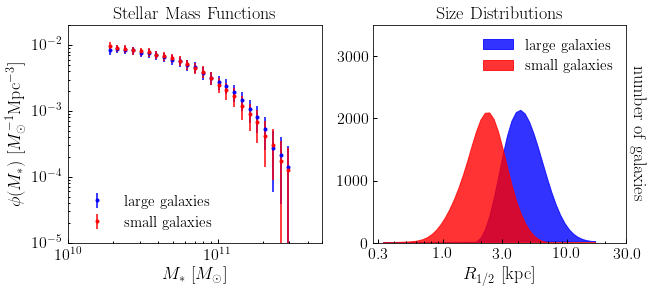

In [41]:
sm_min = 10.25
small, large = sdss_sm10p25_small, sdss_sm10p25_large
sm_bins = np.linspace(sm_min, 11.5, 25)
smf_mids = 0.5*(sm_bins[:-1] + sm_bins[1:])

counts_all, __ = np.histogram(sdss_sm10p25['sm'], bins=sm_bins, density=False)
counts_small, __ = np.histogram(small['sm'], bins=sm_bins, density=False)
counts_large, __ = np.histogram(large['sm'], bins=sm_bins, density=False)

pdf_all, __ = np.histogram(sdss_sm10p25['sm'], bins=sm_bins, density=True)
pdf_small, __ = np.histogram(small['sm'], bins=sm_bins, density=True)
pdf_large, __ = np.histogram(large['sm'], bins=sm_bins, density=True)

Veff = 165.**3
nd_all = len(sdss_sm10p25)/Veff
nd_small = nd_all*len(small)/float(len(sdss_sm10p25))
nd_large = nd_all*len(large)/float(len(sdss_sm10p25))

smf_all = pdf_all*nd_all
smf_small = pdf_small*nd_small
smf_large = pdf_large*nd_large

binwidth = np.diff(sm_bins)[0]
smf_all_errors = smf_all/np.sqrt(counts_all*binwidth)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
xscale2 = ax2.set_xscale('log')
xscale1 = ax1.set_xscale('log', nonposx="clip")
yscale1 = ax1.set_yscale('log', nonposy="clip")

ylim1 = ax1.set_ylim(1e-5, 0.02)
xlim1 = ax1.set_xlim(1e10, 5e11)

__=ax1.errorbar(10**smf_mids, smf_large, smf_all_errors, fmt='.', 
               color='blue', label=r'${\rm large\ galaxies}$')
__=ax1.errorbar(10**smf_mids, smf_small, smf_all_errors, fmt='.', 
               color='red', label=r'${\rm small\ galaxies}$')
__=ax1.set_ylabel(r'$\phi(M_{\ast})$ $[M_{\odot}^{-1} {\rm Mpc^{-3}}]$')

r50_bins = np.logspace(-0.5, 1.25, 50)
r50_mids = 10**(0.5*(np.log10(r50_bins[:-1]) + np.log10(r50_bins[1:])))

y1, __ = np.histogram(small['r50_magr_kpc_meert15'], bins=r50_bins)
y2, __ = np.histogram(large['r50_magr_kpc_meert15'], bins=r50_bins)

from scipy.signal import savgol_filter
y1_smooth = savgol_filter(y1, 15, 5)
y2_smooth = savgol_filter(y2, 15, 5)

from scipy.ndimage.filters import gaussian_filter
gwin = 2
y1_smooth2 = gaussian_filter(y1_smooth, gwin)
y2_smooth2 = gaussian_filter(y2_smooth, gwin)

__=ax2.fill(r50_mids, y2_smooth2, alpha=0.8, 
           label=r'${\rm large\ galaxies}$', color='blue')
__=ax2.fill(r50_mids, y1_smooth2, alpha=0.8, 
           label=r'${\rm small\ galaxies}$', color='red')

__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.set_xticks((0.3, 1, 3, 10, 30))

title1 = ax1.set_title(r'${\rm Stellar\ Mass\ Functions}$')
title2 = ax2.set_title(r'${\rm Size\ Distributions}$')
xlabel1 = ax1.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
xlabel2 = ax2.set_xlabel(r'$R_{1/2}$  $[{\rm kpc}]$')

__=ax2.yaxis.set_label_position('right')
ylabel2 = ax2.set_ylabel(r'${\rm number\ of\ galaxies}$', labelpad=20, rotation=-90)

ylim2 = ax2.set_ylim(0, 3500)
legend1 = ax1.legend()
legend2 = ax2.legend()
__=ax1.tick_params(pad=7)

figname = 'sdss_small_large_sample_definitions.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel1], bbox_inches='tight')

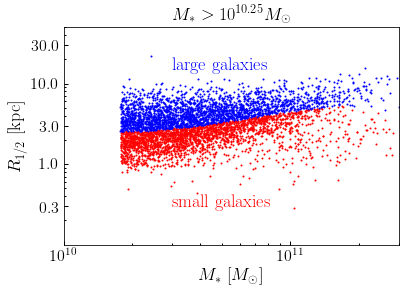

In [25]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 10
__=ax.scatter(10**small['sm'][::nskip], small['r50_magr_kpc_meert15'][::nskip], s=1, 
             color='red')
__=ax.scatter(10**large['sm'][::nskip], large['r50_magr_kpc_meert15'][::nskip], s=1, 
             color='blue')

xlim = ax.set_xlim(1e10, 3e11)
ylim = ax.set_ylim(0.1, 50)
xlabel = ax.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
ylabel = ax.set_ylabel(r'$R_{1/2}$  $[{\rm kpc}]$')
title = ax.set_title(r'$M_{\ast} > 10^{10.25}M_{\odot}$')

a, b = 3e10, 0.3
c, d = 3e10, 15
__=ax.annotate(r'${\rm small\ galaxies}$', xy=(a, b), xytext=(a, b), size=18, 
               color='red', fontweight='bold')
__=ax.annotate(r'${\rm large\ galaxies}$', xy=(c, d), xytext=(c, d), size=18, 
               color='blue')

__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.set_yticks((0.3, 1, 3, 10, 30))

figname = 'sdss_size_vs_mstar_scatter.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel1], bbox_inches='tight')

In [ ]:
# sm_min = 10.25
# small, large = sdss_sm10p25_small, sdss_sm10p25_large
# sm_bins = np.linspace(sm_min, 11.75, 50)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# xscale2 = ax2.set_xscale('log')

# xlim1 = ax1.set_xlim(10, 11.75)
# ylim2 = ax2.set_ylim(0, 3500)

# __=ax1.hist(small['sm'], bins=sm_bins, normed=True, alpha=0.8, 
#             label='small galaxies', color='red')
# __=ax1.hist(large['sm'], bins=sm_bins, normed=True, alpha=0.8, 
#             label='large galaxies', color='blue')

# r50_bins = np.logspace(-0.5, 1.25, 50)
# __=ax2.hist(small['r50_magr_kpc_meert15'], bins=r50_bins, alpha=0.8, 
#            label='small galaxies', color='red')
# __=ax2.hist(large['r50_magr_kpc_meert15'], bins=r50_bins, alpha=0.8, 
#            label='large galaxies', color='blue')

# __=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
# __=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
# __=ax2.set_xticks((0.3, 1, 3, 10, 30))

# title1 = ax1.set_title(r'SDSS sample: $M_{\ast}>10.25$')
# title2 = ax2.set_title(r'SDSS sample: $M_{\ast}>10.25$')
# xlabel1 = ax1.set_xlabel(r'$\log_{10}M_{\ast}/M_{\odot}$')
# xlabel2 = ax2.set_xlabel(r'$R_{1/2}$  $[{\rm kpc}]$')

# legend1 = ax1.legend()
# legend2 = ax2.legend()

# figname = 'sdss_small_large_sample_definitions.pdf'
# fig.savefig(figname, bbox_extra_artists=[xlabel1], bbox_inches='tight')

In [ ]:
from galsize_models.measurements.measure_sdss_clustering import save_wp_measurement

import os
repo_dirname = "/Users/aphearin/work/repositories/python/galsize_models"
output_subdirname = "galsize_models/measurements/data/two_point_functions"
output_dirname = os.path.join(repo_dirname, output_subdirname)

sm_high = 12


In [ ]:
#  red_sm9p75_sm10p25_large
save_wp_measurement(red_sm9p75_sm10p25, output_dirname, 
                    'sdss_mpajhu_red_sm9p75_sm10p25', 9.75, 10.25)
save_wp_measurement(red_sm9p75_sm10p25_large, output_dirname, 
                    'sdss_mpajhu_red_sm9p75_sm10p25_large', 9.75, 10.25)
save_wp_measurement(red_sm9p75_sm10p25_small, output_dirname, 
                    'sdss_mpajhu_red_sm9p75_sm10p25_small', 9.75, 10.25)

save_wp_measurement(blue_sm9p75_sm10p25, output_dirname, 
                    'sdss_mpajhu_blue_sm9p75_sm10p25', 9.75, 10.25)
save_wp_measurement(blue_sm9p75_sm10p25_large, output_dirname, 
                    'sdss_mpajhu_blue_sm9p75_sm10p25_large', 9.75, 10.25)
save_wp_measurement(blue_sm9p75_sm10p25_small, output_dirname, 
                    'sdss_mpajhu_blue_sm9p75_sm10p25_small', 9.75, 10.25)


In [ ]:
save_wp_measurement(blue_sm10p0_sm10p5, output_dirname, 
                    'sdss_mpajhu_blue_sm10p0_sm10p5', 10, 10.5)
save_wp_measurement(blue_sm10p0_sm10p5_large, output_dirname, 
                    'sdss_mpajhu_blue_sm10p0_sm10p5_large', 10, 10.5)
save_wp_measurement(blue_sm10p0_sm10p5_small, output_dirname, 
                    'sdss_mpajhu_blue_sm10p0_sm10p5_small', 10, 10.5)


In [ ]:
save_wp_measurement(sdss_sm9p75, output_dirname, 'sdss_mpajhu_sm9p75', 9.75, sm_high)

save_wp_measurement(sdss_sm10p0, output_dirname, 'sdss_mpajhu_sm10p0', 10., sm_high)
save_wp_measurement(sdss_sm10p25, output_dirname, 'sdss_mpajhu_sm10p25', 10.25, sm_high)
save_wp_measurement(sdss_sm10p5, output_dirname, 'sdss_mpajhu_sm10p5', 10.5, sm_high)
save_wp_measurement(sdss_sm10p75, output_dirname, 'sdss_mpajhu_sm10p75', 10.75, sm_high)

save_wp_measurement(sdss_sm11p0, output_dirname, 'sdss_mpajhu_sm11p0', 11., sm_high)
save_wp_measurement(sdss_sm11p25, output_dirname, 'sdss_mpajhu_sm11p25', 11.25, sm_high)


In [ ]:
save_wp_measurement(sdss_sm9p75_small, output_dirname, 'sdss_mpajhu_sm9p75_small', 9.75, sm_high)

save_wp_measurement(sdss_sm10p0_small, output_dirname, 'sdss_mpajhu_sm10p0_small', 10., sm_high)
save_wp_measurement(sdss_sm10p25_small, output_dirname, 'sdss_mpajhu_sm10p25_small', 10.25, sm_high)
save_wp_measurement(sdss_sm10p5_small, output_dirname, 'sdss_mpajhu_sm10p5_small', 10.5, sm_high)
save_wp_measurement(sdss_sm10p75_small, output_dirname, 'sdss_mpajhu_sm10p75_small', 10.75, sm_high)

save_wp_measurement(sdss_sm11p0_small, output_dirname, 'sdss_mpajhu_sm11p0_small', 11., sm_high)
save_wp_measurement(sdss_sm11p25_small, output_dirname, 'sdss_mpajhu_sm11p25_small', 11.25, sm_high)


In [ ]:
save_wp_measurement(sdss_sm9p75_large, output_dirname, 'sdss_mpajhu_sm9p75_large', 9.75, sm_high)

save_wp_measurement(sdss_sm10p0_large, output_dirname, 'sdss_mpajhu_sm10p0_large', 10., sm_high)
save_wp_measurement(sdss_sm10p25_large, output_dirname, 'sdss_mpajhu_sm10p25_large', 10.25, sm_high)
save_wp_measurement(sdss_sm10p5_large, output_dirname, 'sdss_mpajhu_sm10p5_large', 10.5, sm_high)
save_wp_measurement(sdss_sm10p75_large, output_dirname, 'sdss_mpajhu_sm10p75_large', 10.75, sm_high)

save_wp_measurement(sdss_sm11p0_large, output_dirname, 'sdss_mpajhu_sm11p0_large', 11., sm_high)
save_wp_measurement(sdss_sm11p25_large, output_dirname, 'sdss_mpajhu_sm11p25_large', 11.25, sm_high)
